# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [4]:
print(len(master))
# master.head(5)

494


In [5]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [6]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 1d7956b5-2f5e-4994-8c91-78fc6d22951a
Data columns (total 9 columns):
distance            494 non-null float64
drive_time          494 non-null float64
month               494 non-null int64
price               494 non-null int64
cash                321 non-null float64
peak                321 non-null float64
pickup_datetime     494 non-null datetime64[ns]
drop_datetime       494 non-null datetime64[ns]
shop_position_id    494 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 38.6+ KB


In [8]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [9]:
# df.head(3)

## 毎日のデータ集計

In [10]:
target_day = datetime.datetime(2020, 3, 1).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [11]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
1daaa003-ab59-41f8-8da4-0f5bf215550f,0.97,9.7,3,538,2922.0,110.0,2020-03-01 11:15:00,2020-03-01 11:37:00,35.600460052490234-139.61387634277344,2020-03-01,6,Sunday,1,11,9
ab966cba-6b49-47dd-a05e-48c849b0038a,1.95,14.1,3,656,0.0,0.0,2020-03-01 11:31:00,2020-03-01 11:57:00,35.59983444213867-139.61271667480472,2020-03-01,6,Sunday,1,11,9
ad1aabc1-5c7a-4e9a-bb04-429fae30a51e,3.14,18.4,3,687,0.0,0.0,2020-03-01 11:55:00,2020-03-01 12:30:00,35.600486755371094-139.61152648925778,2020-03-01,6,Sunday,1,11,9
1e8a37c2-e7e5-4a36-9a37-1dd74012f02a,1.42,12.6,3,584,0.0,0.0,2020-03-01 12:55:00,2020-03-01 13:12:00,35.5998420715332-139.61280822753906,2020-03-01,6,Sunday,1,12,9
4b27206b-08bc-491c-84e8-dc0b9d86bdc5,1.22,10.2,3,553,0.0,0.0,2020-03-01 13:25:00,2020-03-01 13:39:00,35.587867736816406-139.6287841796875,2020-03-01,6,Sunday,1,13,9
f34c3ea6-7960-4209-adf9-183ee6fb0cd2,0.77,9.2,3,416,0.0,0.0,2020-03-01 13:40:00,2020-03-01 13:52:00,35.58704376220703-139.63005065917972,2020-03-01,6,Sunday,1,13,9
d774390e-e67e-4887-af2e-60b06f75b5c5,1.22,12.0,3,443,1570.0,0.0,2020-03-01 14:05:00,2020-03-01 14:18:00,35.586814880371094-139.62994384765622,2020-03-01,6,Sunday,1,14,9
1d7956b5-2f5e-4994-8c91-78fc6d22951a,1.88,22.0,3,614,0.0,0.0,2020-03-01 18:17:00,2020-03-01 18:45:00,35.57536315917969-139.65950012207028,2020-03-01,6,Sunday,1,18,9
8c4be6fd-b95d-41b5-af57-1cc0b309e4ce,2.08,17.4,3,585,1371.0,140.0,2020-03-01 18:52:00,2020-03-01 19:15:00,35.575279235839844-139.65948486328122,2020-03-01,6,Sunday,1,18,9


In [12]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [13]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロングドロップ{}件, ピーク{}件({}円), 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, peak_count, peak_sum, cash_count))

2020-03-01  配達件数: 14件, 配達時間: 3.4h, 配達距離: 25.74km, 配達報酬: 7575円, ロングドロップ5件, ピーク2件(250円), 現金4件


## 日別の集計

In [14]:
groupby = df.groupby('date')

In [15]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [16]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月日,,,,,,,,,
2020-01-07,4,0.9,5.08,1605,0,0,0,10.8,5.53
2020-01-09,13,3.4,18.77,5558,2,0,0,10.7,5.59
2020-01-10,12,3.3,22.37,5319,4,0,0,8.7,6.86
2020-01-11,14,3.7,23.21,7156,5,0,0,9.5,6.35
2020-01-13,16,3.5,23.44,8506,4,8,10,8.8,6.79
2020-01-14,15,4.4,29.04,7235,7,3,6,9.1,6.63
2020-01-17,11,2.6,15.46,5142,2,2,6,10.1,5.94
2020-01-20,15,3.4,25.02,6550,5,1,13,8.0,7.46
2020-01-21,11,2.6,18.62,5123,3,2,4,8.3,7.26


## 週別の集計

In [17]:
groupby = df.groupby('week_of_month')

In [18]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [19]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
週番号,,,,,,,,,
1,26,6.5,40.66,12875,7,0,0,9.6,6.23
2,59,15.0,88.88,26269,13,0,0,10.1,5.93
3,42,10.4,67.94,20883,13,13,22,9.2,6.51
4,31,7.5,56.67,14836,11,5,19,8.0,7.52
5,51,13.2,87.63,26421,14,16,30,9.1,6.62
6,35,8.4,55.55,17142,9,1,9,9.1,6.62
7,56,12.5,80.61,28469,10,13,16,9.3,6.44
8,54,11.2,74.19,25641,4,8,23,9.1,6.61
9,52,11.9,78.87,28619,11,9,14,9.0,6.64


## 月別の集計

In [20]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [21]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月,,,,,,,,,
1,168,42.3,275.81,79884,48,24,56,9.2,6.52
2,212,48.0,312.48,108459,37,39,73,9.2,6.51
3,14,3.4,25.74,7575,5,2,4,8.0,7.51
12,100,33.1,169.77,48737,27,0,0,11.7,5.13


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

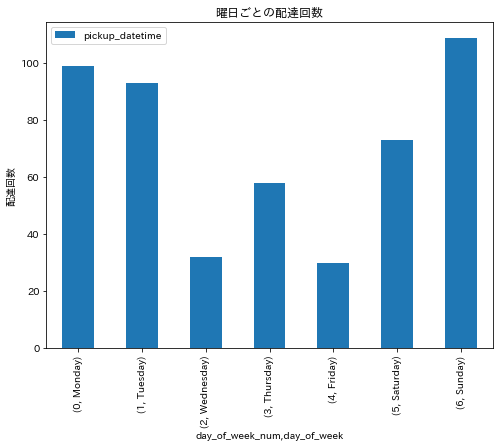

In [22]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

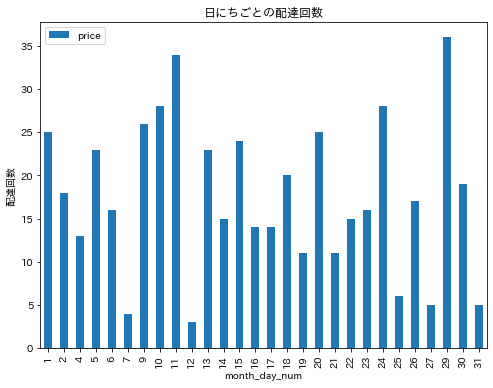

In [23]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

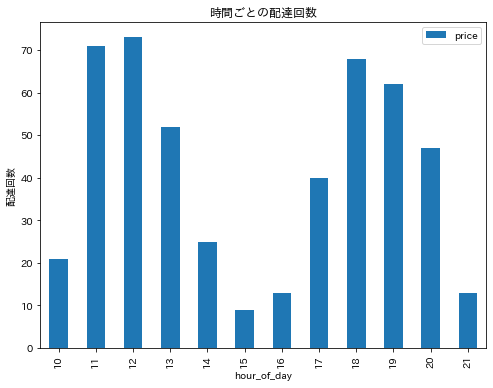

In [24]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

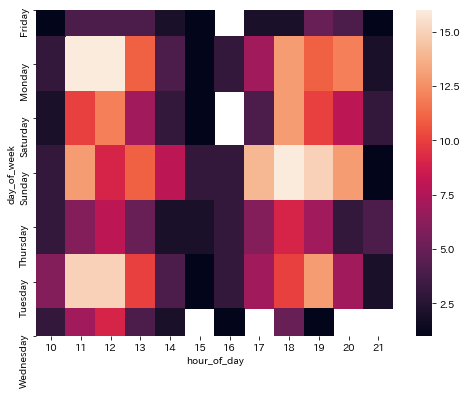

In [25]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)

## 